Aim:

PERFORM K MEANS CLUSTERING ON A DATASET AND ANALYSE ITS PERFORMANCE. ALSO PERFORM OUTLIER DETECTION.

Algorithm:

K-means is an unsupervised machine learning algorithm used for clustering data into K groups based on similarities. It starts by randomly selecting K centroids and assigns each data point to the nearest centroid. Then, it updates the centroids by calculating the mean of the points in each cluster. This process repeats until the centroids stabilize or a set number of iterations is reached. The goal is to minimize the sum of squared distances between data points and their assigned centroids, resulting in well-defined clusters. K-means is efficient but can be sensitive to outliers and the initial placement of centroids.

Code:



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy import stats

In [2]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

Kmeans without outlier detection


In [4]:
kmeans_no_outliers = KMeans(n_clusters=3, random_state=42)  # There are 3 species in Iris dataset
kmeans_no_outliers.fit(data_scaled)

labels_no_outliers = kmeans_no_outliers.predict(data_scaled)

inertia_no_outliers = kmeans_no_outliers.inertia_
silhouette_no_outliers = silhouette_score(data_scaled, labels_no_outliers)



Kmeans with outlier detection

In [5]:
z_scores = np.abs(stats.zscore(data_scaled))
outliers = (z_scores > 3)  # Outliers are points with Z-score > 3

data_cleaned = data[np.any(outliers, axis=1) == False]  # Remove outliers

data_scaled_cleaned = scaler.fit_transform(data_cleaned)  # Scale the cleaned data

kmeans_with_outliers_removed = KMeans(n_clusters=3, random_state=42)
kmeans_with_outliers_removed.fit(data_scaled_cleaned)

labels_with_outliers_removed = kmeans_with_outliers_removed.predict(data_scaled_cleaned)

inertia_with_outliers_removed = kmeans_with_outliers_removed.inertia_
silhouette_with_outliers_removed = silhouette_score(data_scaled_cleaned, labels_with_outliers_removed)

Output

K-means without outliers:
Inertia: 191.02473685317966
Silhouette Score: 0.4798814508199817

K-means with outliers removed:
Inertia: 191.56432477042694
Silhouette Score: 0.4808561464017338


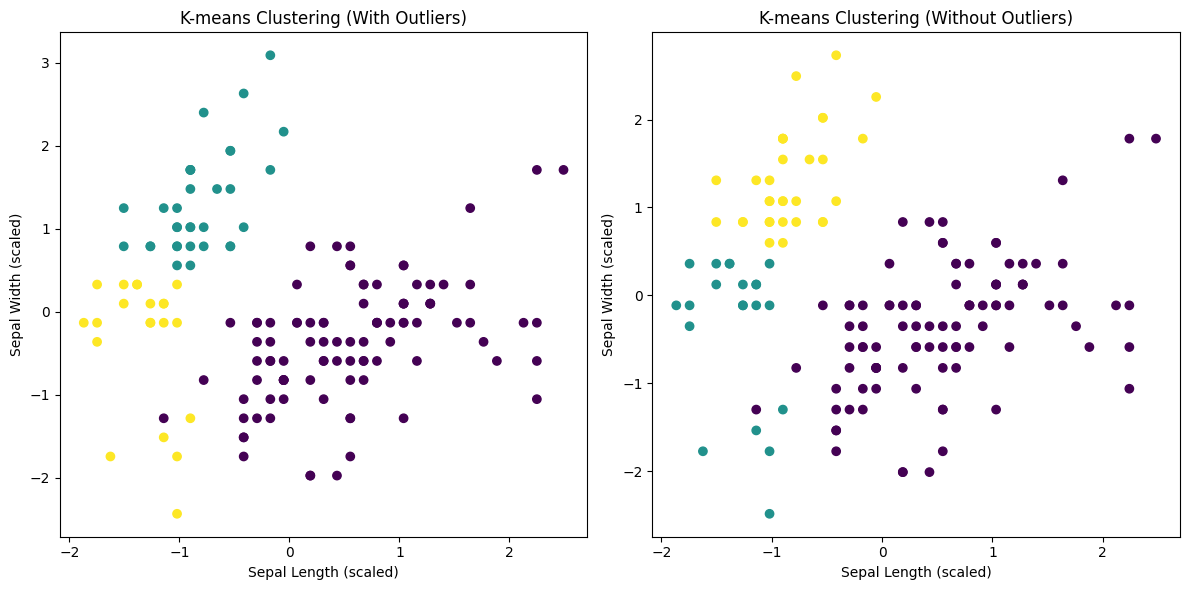

In [6]:
print(f'K-means without outliers:')
print(f'Inertia: {inertia_no_outliers}')
print(f'Silhouette Score: {silhouette_no_outliers}\n')

print(f'K-means with outliers removed:')
print(f'Inertia: {inertia_with_outliers_removed}')
print(f'Silhouette Score: {silhouette_with_outliers_removed}')

plt.figure(figsize=(12, 6))

# Plot K-means without outliers
plt.subplot(1, 2, 1)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels_no_outliers, cmap='viridis')
plt.title('K-means Clustering (With Outliers)')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')

# Plot K-means with outliers removed
plt.subplot(1, 2, 2)
plt.scatter(data_scaled_cleaned[:, 0], data_scaled_cleaned[:, 1], c=labels_with_outliers_removed, cmap='viridis')
plt.title('K-means Clustering (Without Outliers)')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')

plt.tight_layout()
plt.show()


Result:
Kmeans clustering has been performed with and without outlier detection.The performance of the clustering improved with outlier removal